# Details about Time Series handling and Indexing and Selecting data in Xarray

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

We will work with some data available through the xarray packages (yes the loading has a different syntax, this is valid only for data in the tutorial method)

In [2]:
# load a sample dataset
ds = xr.tutorial.load_dataset('air_temperature')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 244.0 244.09999 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [4]:
ds.lat

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [5]:
ds.time[1]

<xarray.DataArray 'time' ()>
array('2013-01-01T06:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2013-01-01T06:00:00
Attributes:
    standard_name:  time
    long_name:      Time

# Time series data
### important to read here
http://xarray.pydata.org/en/stable/time-series.html
    

In [6]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 244.0 244.09999 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [7]:
ds.time.dt.month

<xarray.DataArray 'month' (time: 2920)>
array([ 1,  1,  1, ..., 12, 12, 12])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...

In [8]:
ds.time.dt.hour

<xarray.DataArray 'hour' (time: 2920)>
array([ 0,  6, 12, ...,  6, 12, 18])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...

In [9]:
ds.time.dt.season

<xarray.DataArray 'season' (time: 2920)>
array(['DJF', 'DJF', 'DJF', ..., 'DJF', 'DJF', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...

In [10]:
ds.groupby('time.season').mean('time')

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, season: 4)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float32 247.01007 246.95503 246.71684 ...

However, datetime is an instantaneous value, so when certain operations are done on not equally spaced intervals (think about yearly average starting from monthly scale, February months are not long as March) The length of the DELTA interval is not considered. Rather it will correctly match Feb with Feb and so on, but it won't weight February differently .... Same thing when you do a decadal mean and you have leap and not leap years (this is almost never done, but in case your research requires this, have a look at the example below).

A rather elaborate example of how to create these weights is here

http://xarray.pydata.org/en/stable/examples/monthly-means.html

This is essentially in line with doing lat and lon averages...


# Indexing and selecting

In [11]:
type(ds)

xarray.core.dataset.Dataset

In [12]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 244.0 244.09999 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [13]:
da = ds['air']
type(da)

xarray.core.dataarray.DataArray

Now I have a dataset and a dataarray

numpy style indexing still works (but preserves the labels/metadata when we plot it for example) 

Note how i have to add the ":" for the first dimension that I am not selecting through. 

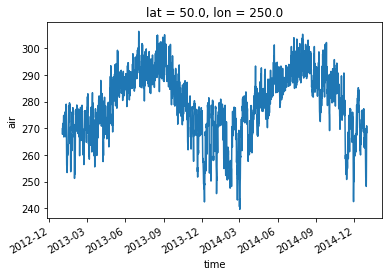

In [14]:

da[:, 10, 20].plot()

Positional indexing using dimension names - remember it is POSITIONAL, so it won't use longitude equal 20, but the 21th value of longitude

isel lookup by integer

In [15]:
da.lon[20]

<xarray.DataArray 'lon' ()>
array(250., dtype=float32)
Coordinates:
    lon      float32 250.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

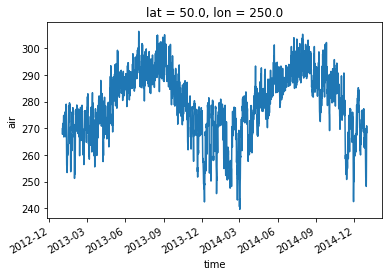

In [16]:
da.isel(lon=20, lat=10 ).plot()


More interesting is Label-based indexing - you don't need to know the position

sel does lookup by label (label can be any datatype, in our case we have datetime64 and lat/lon that are float32)

In [17]:
type(da.lat.values[0])

numpy.float32

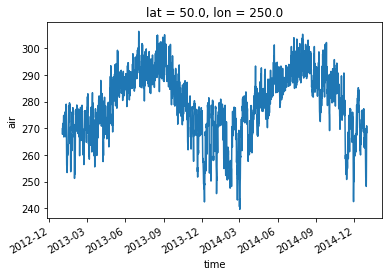

In [18]:
da.sel(lat=50., lon=250.).plot()

When you select a point, nearest neighbor is easily done

Nearest neighbor lookups

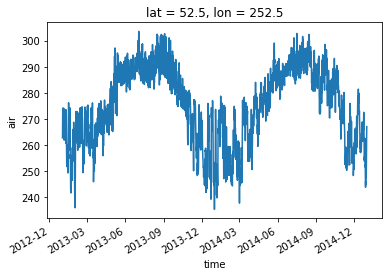

In [19]:

da.sel(lat=52.25, lon=251.8998, method='nearest').plot()


Indexing by integer array indices (I use isel)

In [20]:
print(da.lat[0])
print(da.lon[0])
print(da.time[0:3])

<xarray.DataArray 'lat' ()>
array(75., dtype=float32)
Coordinates:
    lat      float32 75.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y
<xarray.DataArray 'lon' ()>
array(200., dtype=float32)
Coordinates:
    lon      float32 200.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X
<xarray.DataArray 'time' (time: 3)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    standard_name:  time
    long_name:      Time


### slice() allows you to - ahem - slice the data. It has a different behavious whether you use it in isel, or sel, inherited from Panads and Numpy

In isel() it's not inclusive of the last value (similarly to numpy indexing:

array[0:3] 

won't include the fourth [position 3] value

In [21]:
print( da.lat[0:2])
print( da.lon[0])
print( da.time[0:2])

<xarray.DataArray 'lat' (lat: 2)>
array([75. , 72.5], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y
<xarray.DataArray 'lon' ()>
array(200., dtype=float32)
Coordinates:
    lon      float32 200.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X
<xarray.DataArray 'time' (time: 2)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00
Attributes:
    standard_name:  time
    long_name:      Time


In [22]:
da.isel(lat=slice(0,2), lon=0, time=slice(0, 2))

<xarray.DataArray 'air' (time: 2, lat: 2)>
array([[241.2    , 243.79999],
       [242.09999, 243.59999]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Using sel, instead, slice it is inclusive

In [23]:
# index by dimension coordinate labels
da.sel(lat=slice(75,71), lon=200, time=slice('2013-01-01', '2013-01-01T06:00:00'))

<xarray.DataArray 'air' (time: 2, lat: 2)>
array([[241.2    , 243.79999],
       [242.09999, 243.59999]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Please note how the slicing along latitude and time included whatever is in between and equal to the start and end of the slicing. 

Also note, latitude is ordered in the opposite way:

In [24]:
da.lat

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

Because of this, slicing without taking this into account will give me an empty latitude dimension

In [25]:
da.sel(lat=slice(71,75), lon=200, time=slice('2013-01-01', '2013-01-01T06:00:00'))

<xarray.DataArray 'air' (time: 2, lat: 0)>
array([], shape=(2, 0), dtype=float32)
Coordinates:
  * lat      (lat) float32 
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Method Nearest doesn't work when slice() is used, however you can always split up the selection if you need to use the method=nearest for one of the dimesnnions

In [26]:
da.sel(lat=71, lon=199, method='nearest').sel(time=slice('2013-01-01', '2013-01-01T06:00:00'))

<xarray.DataArray 'air' (time: 2)>
array([250. , 253.2], dtype=float32)
Coordinates:
    lat      float32 70.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

# Drop

it is used usually to drop a variable altogether, it can also be used to drop a dimension

it works for both dataset and dataarray

In [27]:
arr = xr.DataArray(np.random.rand(4, 3),
                  [('time', pd.date_range('2000-01-01', periods=4)),
                     ('space', ['IA', 'IL', 'IN'])])
arr

<xarray.DataArray (time: 4, space: 3)>
array([[0.559998, 0.26724 , 0.743241],
       [0.044651, 0.390271, 0.07231 ],
       [0.957574, 0.552451, 0.657987],
       [0.798716, 0.72818 , 0.454766]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [28]:
arr.drop(['IN', 'IL'], dim='space')

<xarray.DataArray (time: 4, space: 1)>
array([[0.559998],
       [0.044651],
       [0.957574],
       [0.798716]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA'

In [29]:
dsarr = arr.to_dataset(name='foo')
dsarr

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    foo      (time, space) float64 0.56 0.2672 0.7432 0.04465 0.3903 0.07231 ...

In [30]:
dsarr.drop(['IN', 'IL'], dim='space')

<xarray.Dataset>
Dimensions:  (space: 1, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA'
Data variables:
    foo      (time, space) float64 0.56 0.04465 0.9576 0.7987

# Masking with where

As mentioned before, where "masks" the data

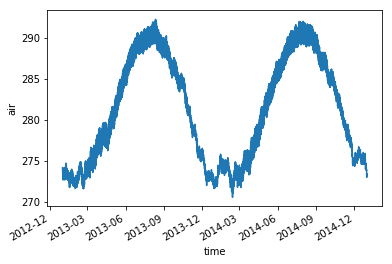

In [31]:
ds
ds.air.mean(dim=['lat','lon']).plot()

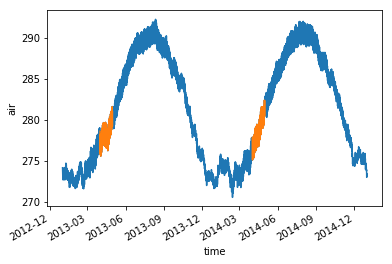

In [32]:
ds.air.mean(dim=['lat','lon']).plot()
ds.air.mean(dim=['lat','lon']).where(ds.time.dt.month==4).plot()

#da.sel(lat=75, lon=200, time=slice('2013-01-01', '2013-01-01T06:00:00'))

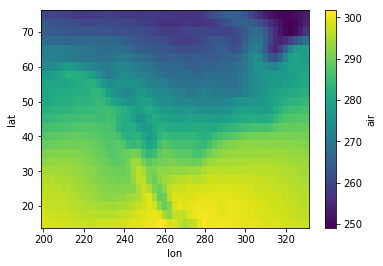

In [33]:
dsmeantime = ds.air.mean(dim=['time'])
dsmeantime.plot()

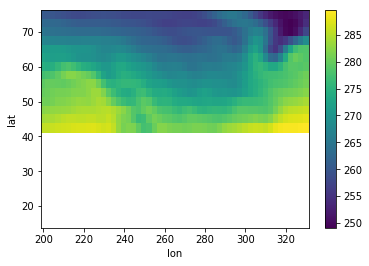

In [34]:
dsmeantime.where(dsmeantime.lat>40).plot()

In [35]:
dsmeantime.where(dsmeantime.lat>40&dsmeantime.lat<60&dsmeantime.lon>220&dsmeantime.lon<300).plot()

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

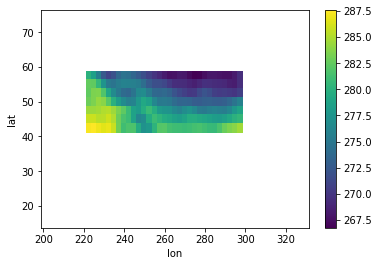

In [36]:
dsmeantime.where((dsmeantime.lat>40)&(dsmeantime.lat<60)&(dsmeantime.lon>220)&(dsmeantime.lon<300)).plot()

# Vectorized indexing
 you can supply DataArray() objects as indexers. Dimensions on resultant arrays are given by the ordered union of the indexers’ dimensions:

In [37]:
# generate a coordinates for a transect of points
lat_points = xr.DataArray([52, 60, 75], dims='points')
lon_points = xr.DataArray([250, 250, 250], dims='points')
lat_points

<xarray.DataArray (points: 3)>
array([52, 60, 75])
Dimensions without coordinates: points

nearest neighbor selection along the transect, in this case the order doesn't matter, these are points

In [38]:
da.sel(lat=lat_points, lon=lon_points, method='nearest')

<xarray.DataArray 'air' (time: 2920, points: 3)>
array([[269.5    , 256.19998, 246.5    ],
       [269.29   , 261.6    , 244.     ],
       [273.69998, 262.19998, 242.2    ],
       ...,
       [267.49   , 263.29   , 246.68999],
       [269.29   , 263.59   , 244.39   ],
       [268.69   , 259.29   , 242.79   ]], dtype=float32)
Coordinates:
    lat      (points) float32 52.5 60.0 75.0
    lon      (points) float32 250.0 250.0 250.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Dimensions without coordinates: points
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

There is much more to this but I am still exploring the pros and cons

# Assign values to a dataarray

this theme is not well described in the help page, and I will try and update that. In the meanwhile below find some examples

In [39]:
davi = xr.DataArray(np.arange(12).reshape((3, 4)), dims=['x', 'y'],
                coords={'x': [0, 1, 2], 'y': ['a', 'b', 'c', 'd']})

davi

<xarray.DataArray (x: 3, y: 4)>
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) <U1 'a' 'b' 'c' 'd'

you can use numpy like assignment

In [40]:
# davi[0,:,:]= -1
davi[0]= -1
davi

<xarray.DataArray (x: 3, y: 4)>
array([[-1, -1, -1, -1],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) <U1 'a' 'b' 'c' 'd'

In [41]:
davi[0,1]= -2
davi

<xarray.DataArray (x: 3, y: 4)>
array([[-1, -2, -1, -1],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) <U1 'a' 'b' 'c' 'd'

But if you want to select an area? and assign a value to it?

After some researching I have found that there are two ways to do it.

First, let's see what doesn't work:

1) using where() 

In [42]:
davi.where((davi.x==2)&(davi.y=='b'))=100
davi

SyntaxError: can't assign to function call (<ipython-input-42-c4212b6122b8>, line 1)

2) using isel()

In [43]:
davi.isel(x=0)=100
davi

SyntaxError: can't assign to function call (<ipython-input-43-60621bb11f0c>, line 1)

3) using sel()

In [44]:
davi.sel(x=2, y='c') =2000

SyntaxError: can't assign to function call (<ipython-input-44-974e6debed29>, line 1)

4) in some cases it will fail silently (chain indexing)

In [45]:
dafs = xr.DataArray([10, 11, 12, 13], dims=['x'])

In [46]:
dafs.isel(x=[0, 1, 2])

<xarray.DataArray (x: 3)>
array([10, 11, 12])
Dimensions without coordinates: x

In [47]:
dafs.isel(x=[0, 1, 2])[1] 

<xarray.DataArray ()>
array(11)

In [48]:
dafs.isel(x=[0, 1, 2])[1] +=1

So - what does it work?

you have two options, one using loc()+dictionary of the values you want to select and assign values to, or 

xr.where() - this xr.where() is different from dataarray.where(), http://xarray.pydata.org/en/stable/generated/xarray.where.html

In [49]:
#add an empty 2D dataarray
ds['empty']= xr.full_like(ds.air.mean('time'),fill_value=0)
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 244.0 244.09999 ...
    empty    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

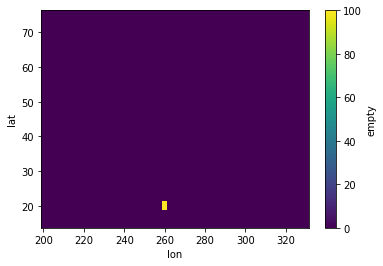

In [50]:
#modify one grid point, using where() or loc()
ds['empty'] = xr.where((ds.coords['lat']==20)&(ds.coords['lon']==260), 100, ds['empty'])
ds.empty.plot()

In [51]:
dict(lon=260, lat=30)

{'lat': 30, 'lon': 260}

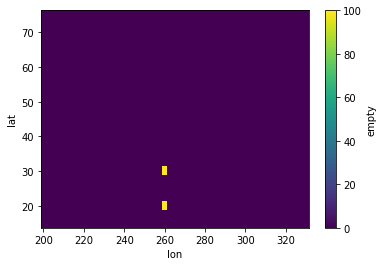

In [52]:
ds['empty'].loc[dict(lon=260, lat=30)] = 100
ds.empty.plot()

In [ ]:
#modify an area with where() and a mask 
mask = (ds.coords['lat']>20)&(ds.coords['lat']<60)&(ds.coords['lon']>220)&(ds.coords['lon']<260)
ds['empty'] = xr.where(mask, 100, ds['empty'])
ds.empty.plot()

In [ ]:
#modify an area with loc()
lc = ds.coords['lon']
la = ds.coords['lat']
ds['empty'].loc[dict(lon=lc[(lc>290)&(lc<300)], lat=la[(la>40)&(la<60)])] = 100
ds.empty.plot()